In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('C:/Users/ravit/Downloads/amazon_prime_titles.csv')

In [56]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [57]:
df.shape

(9668, 12)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [59]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [60]:
df.nunique()

show_id         9668
type               2
title           9668
director        5773
cast            7927
country           86
date_added        84
release_year     100
rating            24
duration         219
listed_in        518
description     9414
dtype: int64

In [61]:
df.duplicated().sum()

np.int64(0)

In [62]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [63]:
df.fillna({'rating':'unavailable','director':'unknown', 'cast':'unavailable','country':'unavailable'}, inplace=True)
df.isna().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added      9513
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [64]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

In [65]:
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
16,s17,Movie,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",unavailable,NaT,2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...
17,s18,TV Show,Zoo Babies,unknown,Narrator - Gillian Barlett,unavailable,NaT,2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...
18,s19,TV Show,Zoë Coombs Marr: Bossy Bottom,unknown,Zoë Coombs Marr,unavailable,NaT,2020,18+,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...
19,s20,Movie,Zoe,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Mirand...",unavailable,NaT,2018,R,104 min,Science Fiction,ZOE tells a tale of forbidden love between an ...
20,s21,TV Show,Zoboomafoo,unknown,unavailable,unavailable,NaT,2001,TV-Y,1 Season,Kids,Chris and Martin Kratt bring their enthusiasm ...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",unavailable,NaT,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",unavailable,NaT,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",unavailable,NaT,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",unavailable,NaT,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [66]:
df.describe()

,date_added,release_year
count,155,9668.000000
mean,2021-07-14 13:46:50.322580736,2008.341849
min,2021-03-30 00:00:00,1920.000000
25%,2021-05-23 00:00:00,2007.000000
50%,2021-07-20 00:00:00,2016.000000
75%,2021-09-16 00:00:00,2019.000000
max,2021-10-10 00:00:00,2021.000000
std,NaN,18.922482


In [67]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,unavailable,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,unavailable,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,unavailable,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,unavailable,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [68]:
df.type.value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Movie and TV Shows')

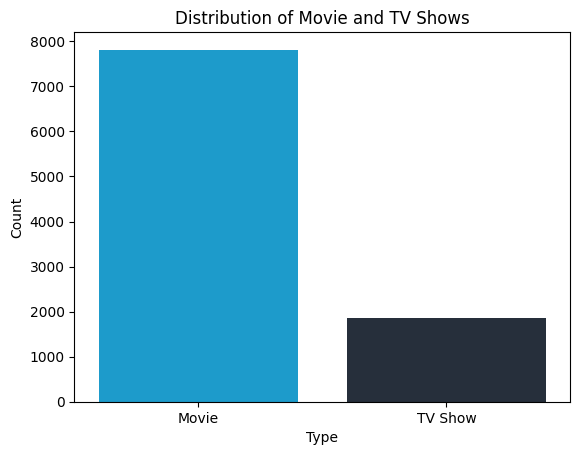

In [69]:
sns.countplot(x='type', data=df, hue='type', palette=['#00A8E8', '#232F3E'], legend=False)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Movie and TV Shows')

Text(0.5, 1.0, 'Rating')

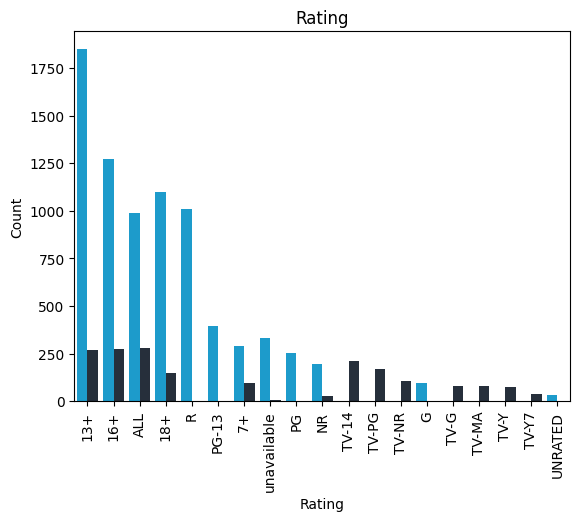

In [70]:
sns.countplot(x='rating', data=df, hue='type',order=df['rating'].value_counts().index[0:19], palette=['#00A8E8', '#232F3E'], legend=False)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Rating')

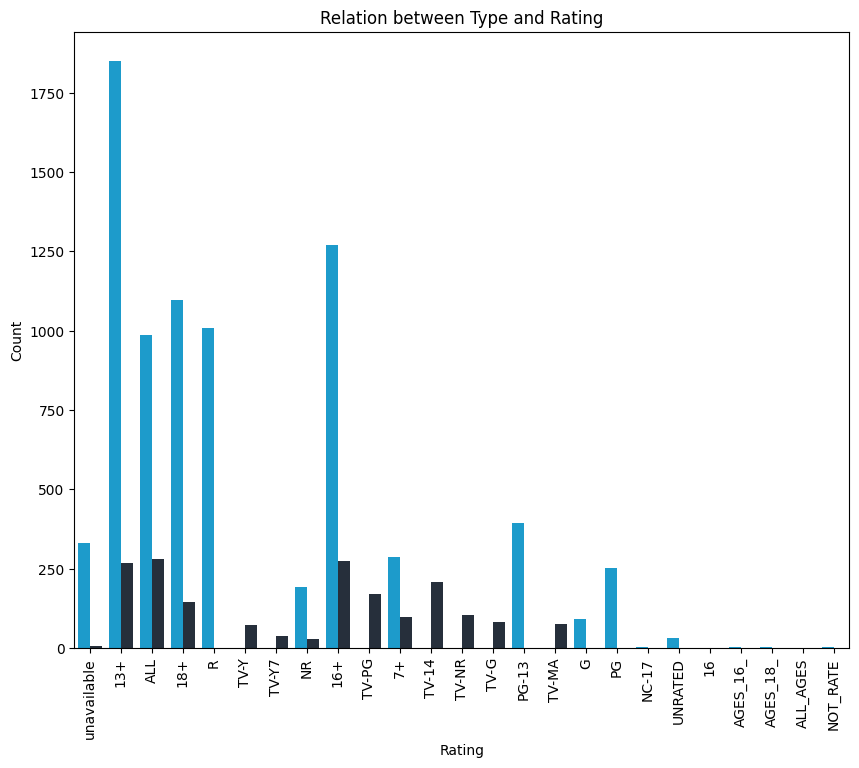

In [71]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating', data=df, hue='type', palette=['#00A8E8', '#232F3E'], legend=False)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Relation between Type and Rating')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='count', ylabel='release_year'>

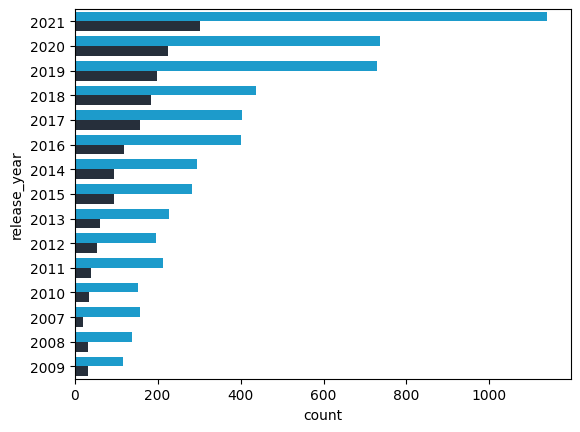

In [72]:
sns.countplot(
    y="release_year", 
    data=df, 
    hue="type", 
    palette=['#00A8E8', '#232F3E'], 
    order=df['release_year'].value_counts().index[0:15], 
    legend=False
)


C:\Users\ravit\AppData\Local\Temp\ipykernel_14020\2223250744.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\ravit\AppData\Local\Temp\ipykernel_14020\2223250744.py:1: UserWarning: 
The palette list has fewer values (2) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


<Axes: xlabel='count', ylabel='release_year'>

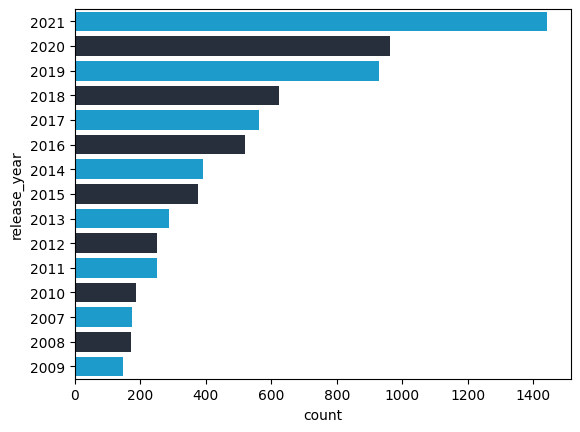

In [73]:
sns.countplot(
    y="release_year", 
    data=df,  
    palette=['#00A8E8', '#232F3E'], 
    order=df['release_year'].value_counts().index[0:15], 
    legend=False
)


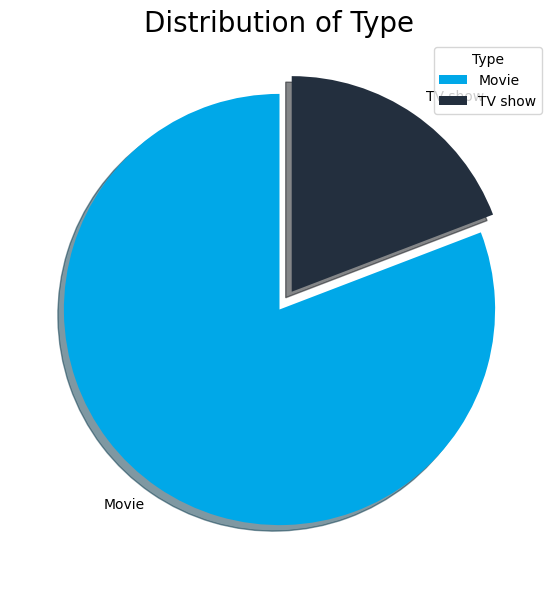

In [74]:
colors = ['#00A8E8', '#232F3E']
plt.figure(figsize=(7,7))
labels = ['Movie', 'TV show']
size = df['type'].value_counts()
explode = [0, 0.1]
plt.pie(size, labels=labels, explode=explode, colors=colors, shadow=True, startangle=90)
plt.title('Distribution of Type', fontsize=20)
plt.legend(title="Type",loc='upper right')
plt.show()

Text(0.5, 1.0, 'Top 10 Genres of Movies')

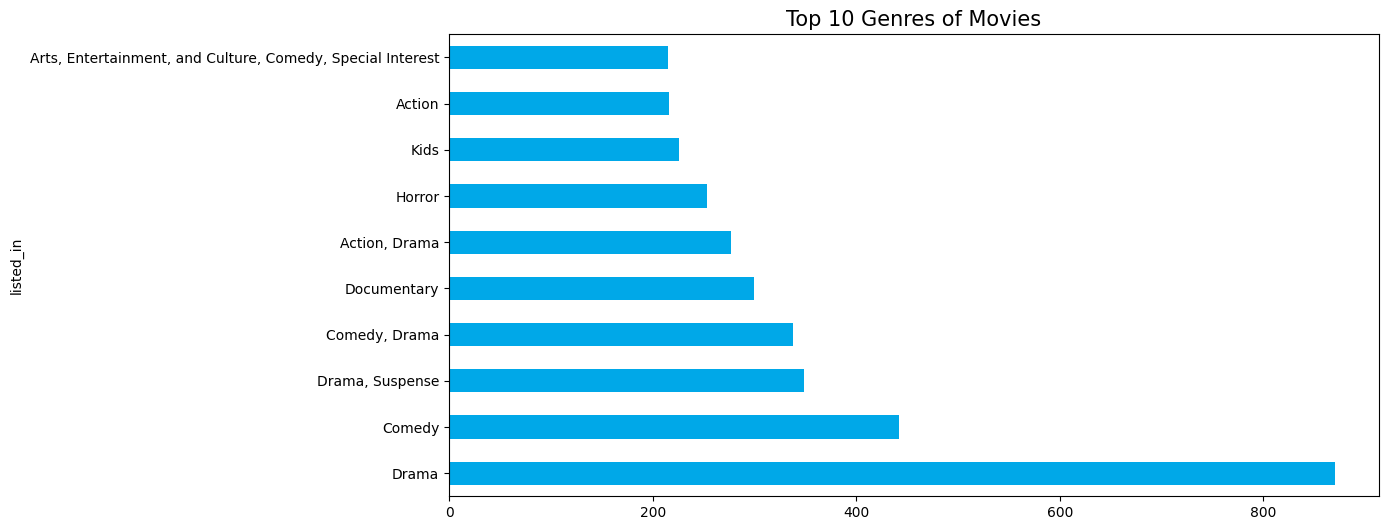

In [75]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="#00A8E8")
plt.title("Top 10 Genres of Movies",size=15)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

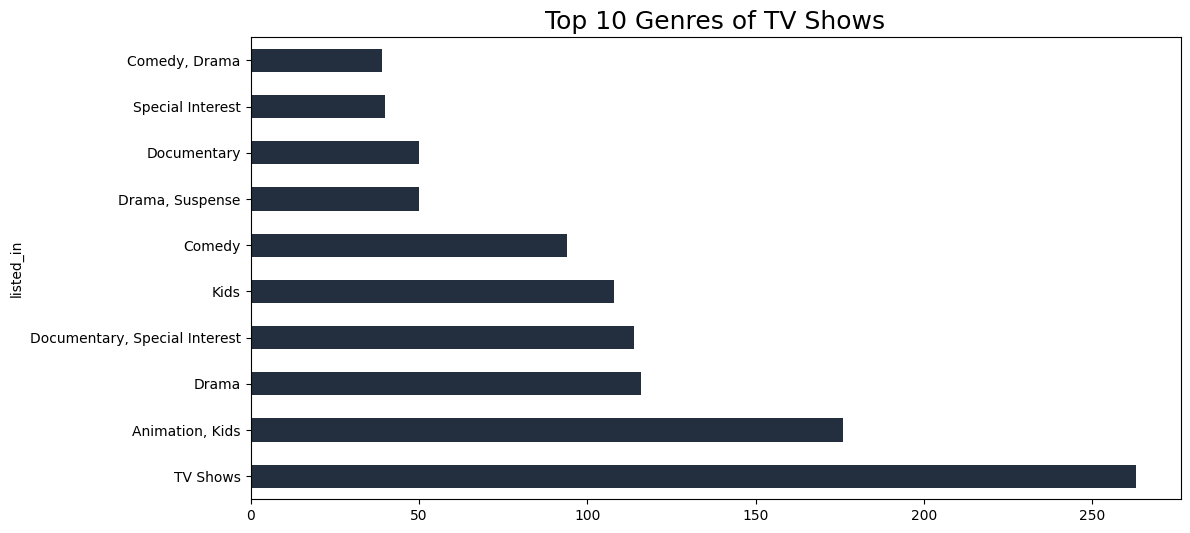

In [76]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="#232F3E")
plt.title("Top 10 Genres of TV Shows",size=18)

In [77]:
country_counts = df['country'].value_counts()
Top_countries = country_counts.head(10)
Top_countries

country
unavailable                      8996
United States                     253
India                             229
United Kingdom                     28
Canada                             16
United Kingdom, United States      12
Spain                               8
Italy                               8
Canada, United States               7
United States, United Kingdom       6
Name: count, dtype: int64

C:\Users\ravit\AppData\Local\Temp\ipykernel_14020\1813487390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ravit\AppData\Local\Temp\ipykernel_14020\1813487390.py:3: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


Text(0, 0.5, 'No of Movies')

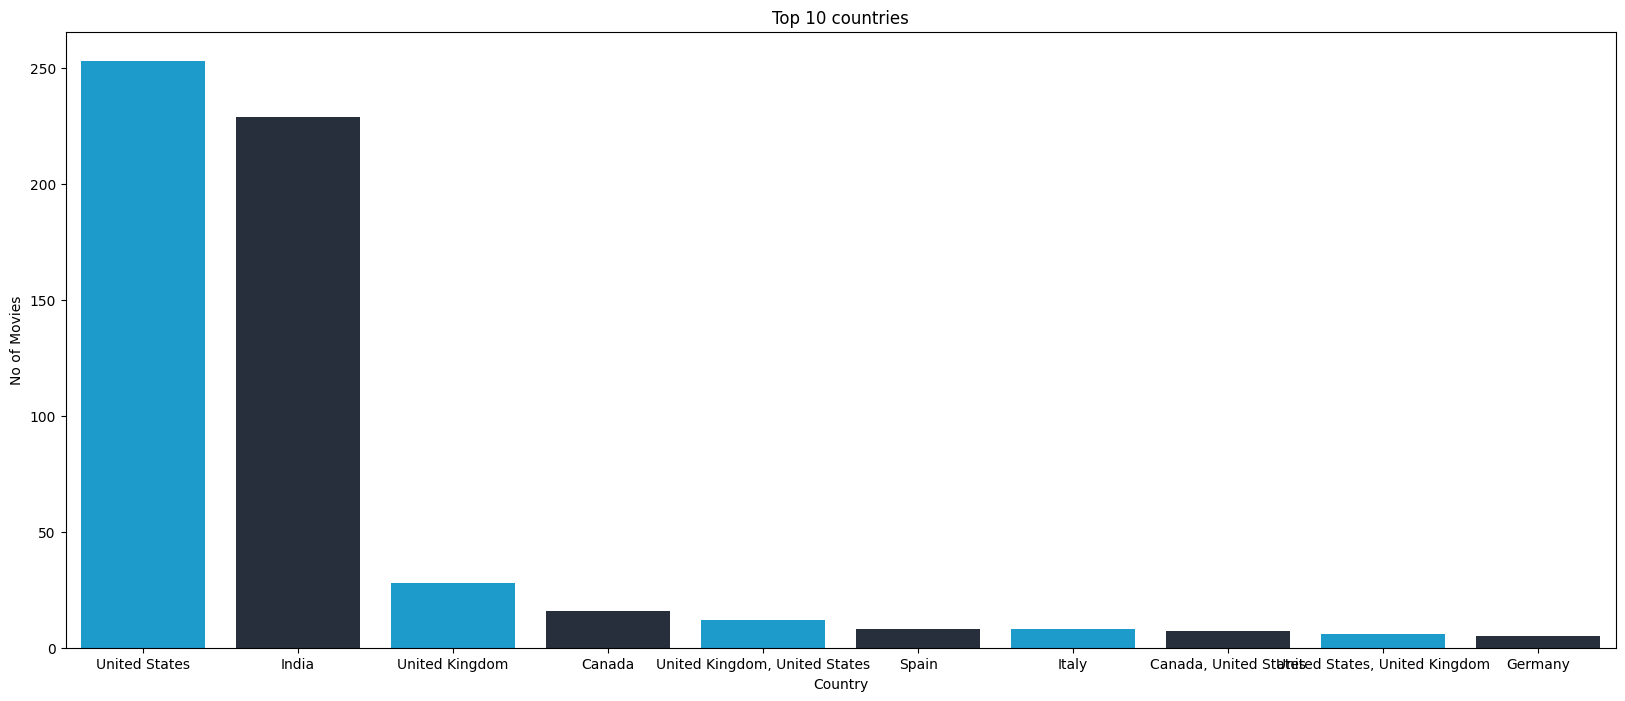

In [78]:
plt.figure(figsize=(20,8))
plt.title('Top 10 countries')
sns.barplot(
    x=df[df['country'] != 'unavailable']['country'].value_counts()[:10].index, 
    y=df[df['country'] != 'unavailable']['country'].value_counts()[:10].values, 
    palette=['#00A8E8', '#232F3E']
)
plt.xlabel('Country')
plt.ylabel('No of Movies')


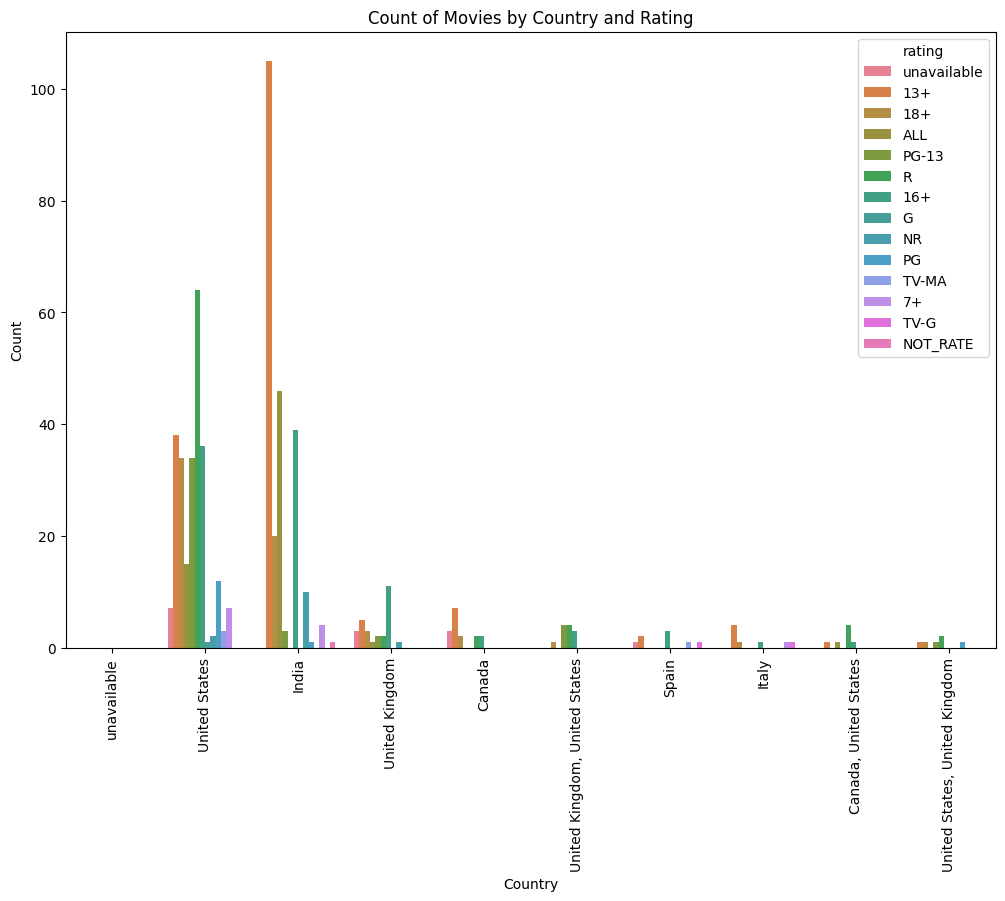

In [79]:
plt.figure(figsize=(12,8))
filtered_df = df[df['country'] != 'unavailable']
sns.countplot(x=filtered_df['country'], order=Top_countries.index, hue=filtered_df['rating'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Movies by Country and Rating')
plt.show()


In [80]:
Top_directors=df['director'].value_counts()[:10]
Top_directors

director
unknown                  2083
Mark Knight               113
Cannis Holder              61
Moonbug Entertainment      37
Jay Chapman                34
Arthur van Merwijk         30
Manny Rodriguez            22
John English               20
1                          16
Brian Volk-Weiss           15
Name: count, dtype: int64

C:\Users\ravit\AppData\Local\Temp\ipykernel_14020\672470501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=top_10_directors, y=top_10_directors.index, palette=['#00A8E8', '#232F3E'])
C:\Users\ravit\AppData\Local\Temp\ipykernel_14020\672470501.py:3: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot( x=top_10_directors, y=top_10_directors.index, palette=['#00A8E8', '#232F3E'])


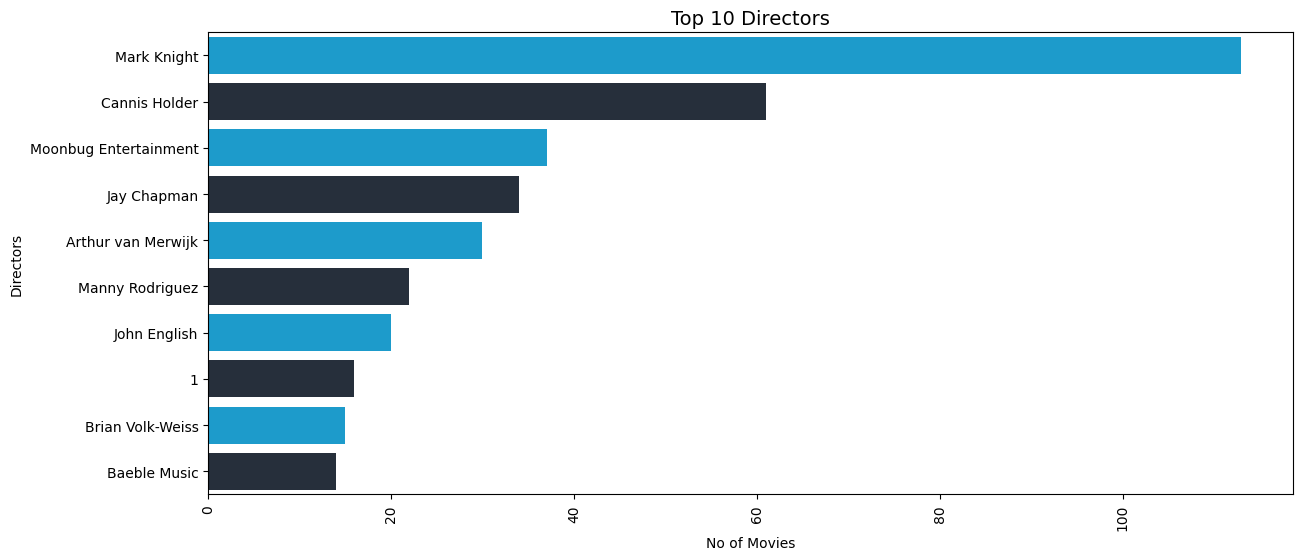

In [81]:
plt.figure(figsize=(14, 6))
top_10_directors = df[df['director'] != "unknown"]['director'].value_counts().head(10)
sns.barplot( x=top_10_directors, y=top_10_directors.index, palette=['#00A8E8', '#232F3E'])
plt.title('Top 10 Directors', fontsize=14)
plt.xlabel('No of Movies')
plt.ylabel('Directors')
plt.xticks(rotation=90)
plt.show()

In [82]:
df['cast'] = df['cast'].str.split(', ')
df_cast = df.explode('cast')
cast_counts = df_cast['cast'].value_counts()

C:\Users\ravit\AppData\Local\Temp\ipykernel_14020\3848238144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_20_Actors, y=Top_20_Actors.index, palette=['#00A8E8', '#232F3E'])
C:\Users\ravit\AppData\Local\Temp\ipykernel_14020\3848238144.py:4: UserWarning: 
The palette list has fewer values (2) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=Top_20_Actors, y=Top_20_Actors.index, palette=['#00A8E8', '#232F3E'])


Text(0, 0.5, 'Actors')

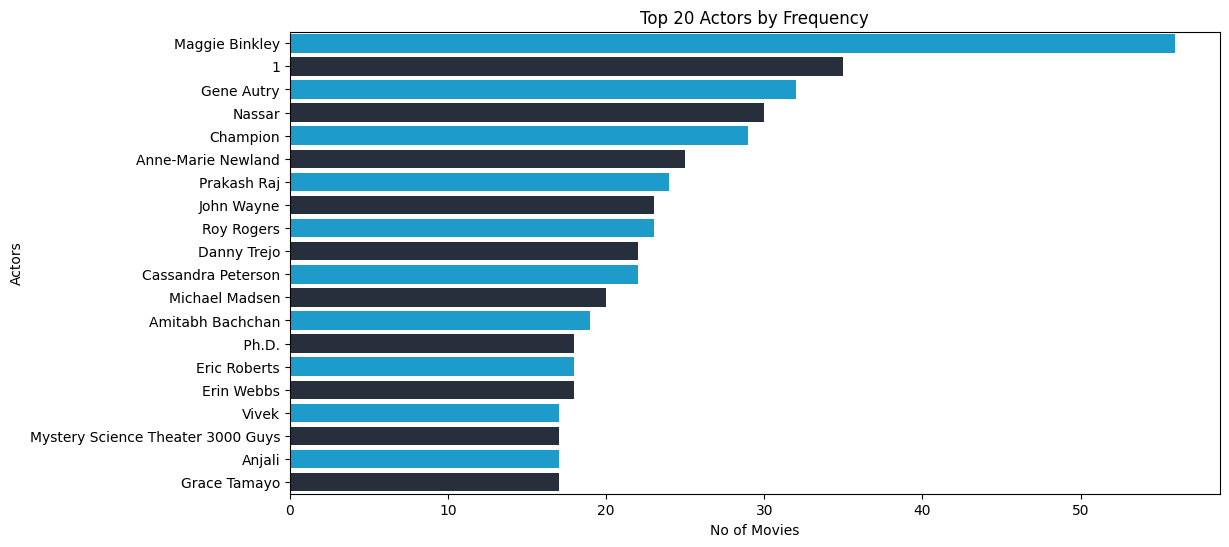

In [83]:
plt.figure(figsize=(12,6))
plt.title("Top 20 Actors by Frequency")
Top_20_Actors = df.explode('cast')['cast'].value_counts()[1:21] 
sns.barplot(x=Top_20_Actors, y=Top_20_Actors.index, palette=['#00A8E8', '#232F3E'])
plt.xlabel('No of Movies')
plt.ylabel('Actors')

In [84]:
unique_genres = df['listed_in'].str.split(', ').explode().unique()
unique_genres

array(['Comedy', 'Drama', 'International', 'Action', 'Suspense',
       'Documentary', 'Fantasy', 'Kids', 'Special Interest',
       'Science Fiction', 'Adventure', 'Horror', 'Sports',
       'Talk Show and Variety', 'Anime', 'Arts', 'Entertainment',
       'and Culture', 'TV Shows', 'Animation',
       'Music Videos and Concerts', 'Fitness', 'Faith and Spirituality',
       'Military and War', 'Western', 'LGBTQ', 'Romance', 'Unscripted',
       'Young Adult Audience', 'Arthouse', 'Historical'], dtype=object)

In [85]:
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)
top_genres

listed_in
Drama               3687
Comedy              2099
Action              1657
Suspense            1501
Kids                1085
Documentary          993
Special Interest     980
Horror               875
Romance              674
Animation            547
Name: count, dtype: int64

C:\Users\ravit\AppData\Local\Temp\ipykernel_14020\3024634686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette=['#00A8E8', '#232F3E'])
C:\Users\ravit\AppData\Local\Temp\ipykernel_14020\3024634686.py:2: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_genres.values, y=top_genres.index, palette=['#00A8E8', '#232F3E'])


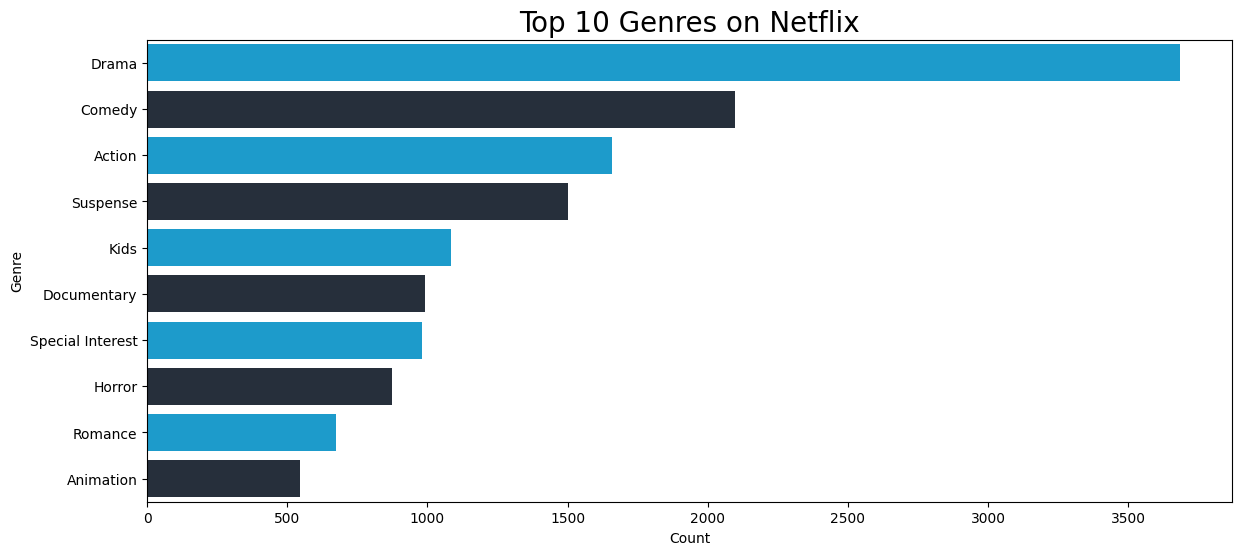

In [86]:
plt.figure(figsize=(14,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette=['#00A8E8', '#232F3E'])
plt.title('Top 10 Genres on Netflix', fontsize=20)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

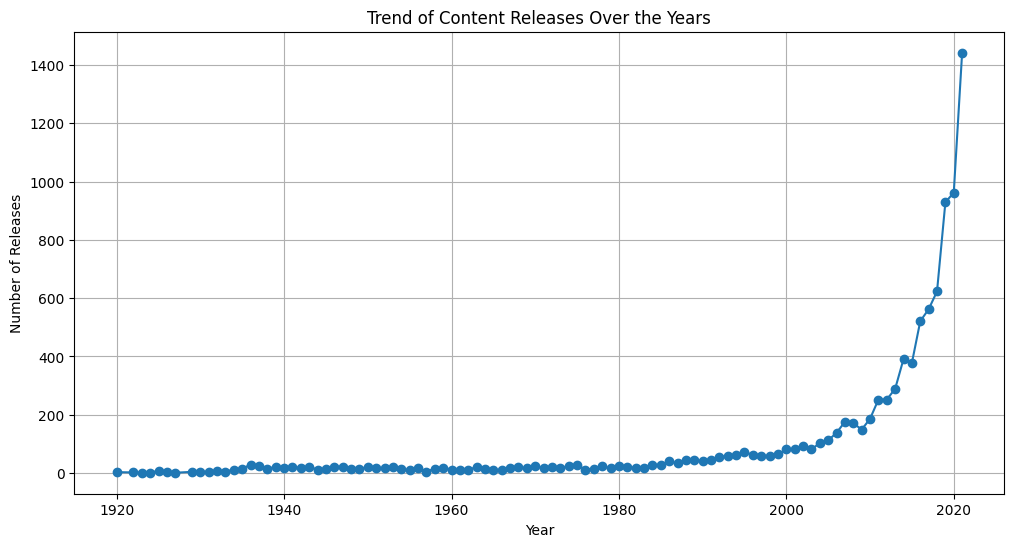

In [87]:
plt.figure(figsize=(12,6))
df.groupby('release_year')['show_id'].count().plot(kind='line', marker='o')
plt.title('Trend of Content Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

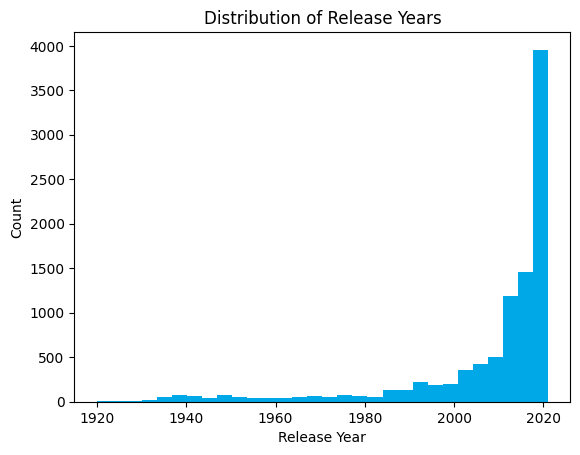

In [88]:
df['release_year'].plot(kind='hist', bins=30,color='#00A8E8')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()
     